# Logistic Regression in Python with Scikit-Learn

## Import the libraries 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
# loading the dataset 

diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Selecting Features

In [4]:
# split the dataset into features (independent variable) and target (dependent variable)

feature_cols = ['Age']
X = diabetes[feature_cols]
y = diabetes.Outcome

## Splitting the data 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Model Development and Prediction

In [6]:
# instantiate the model 

logreg = LogisticRegression()

# fit the model with the data

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
age = [[34]]
logreg.predict(age)

array([0], dtype=int64)

In [8]:
y_pred = logreg.predict(X_test)

In [9]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [11]:
df

,Actual,Predicted
661,1,0
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
366,1,0
301,1,0
382,0,0
140,0,1


# Classification Metrics

#### True Positive (TP)

These are the cases in which we predicted yes, when they are actually diabetic

#### True Negatives (TN)

We predict no, and they are non diabetic 

#### False Positive (FP)

We predicted yes, but they are actually not diabetic (Type 1 error)

#### False Negative (FN)

We predicted no, but they are diabetic (Type 2 error)

- we predict nonsmoker, but the person is a smoker -> FN

- we predict nonsmoker, and the person is a nonsmoker -> TN

- we predict smoker and the person is a smoker -> TP

- we predict smoker and the person is a nonsmoker -> FP

## Accuracy, Recall, Precision and F-score

#### Accuracy
Overall, how often is the classifier correct?
It's the ratio of the correctly labelled subjects to the whole pool of subjects 

Accuracy = total predicted correct / total predicted 

#### Recall [True Positive Rate] 
Recall is the ratio of correctly labelled as positive by the model to all who are diabetic in reality 

Recall answers the following question: of all people who are diabetic, how many of those were correctly predicted? 

Recall = TP/(TP+FN)

#### [False Positive Rate]
Proportion of observations that are incorrectly predicted to be positive out of all the negative observations 

FPR = FP/(TN+FP)

#### Specificity [1-FPR] [True Negative Rate]
The ratio of the correctly negative labelled by the model to all who are negative 
Specifity = TN/(TN+FP)

#### Precision 
Precision is the ratio of the correctly positive labelled by the model to all positive labelled 

Precision answers the following question: how many of those who were labelled as diabetic are actually diabetic? 

Precision = TP/(TP+FP)

#### F-score 
Considers both recall and precision 

F-score = 2*(recall * precision) / (recall + precision)

we want f-score to be high to try and help prove our models 

f-score is used for comparing f-scores from different models and we can see what model gives the best f-score

## Model Evaluation using Confusion Matrix

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [13]:
cnf_matrix

array([[119,  11],
       [ 53,   9]], dtype=int64)

In [14]:
# top left and bottom right = true positive and true negative 

# bottom left and top right = false positive and false negative

<function matplotlib.pyplot.show(*args, **kw)>

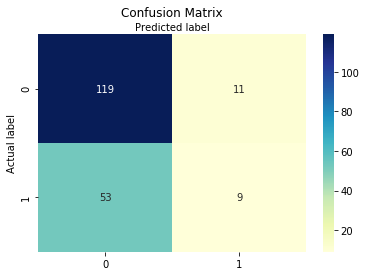

In [15]:
class_names = [0,1]

# the tick marks are the axis labels of 0 and 1 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g') # fmt = the text formatting 
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show

In [16]:
TN: 119
TP: 9
FP: 11
FN: 53

## Confusion Metrix Evaluation Metrics

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       130
           1       0.45      0.15      0.22        62

    accuracy                           0.67       192
   macro avg       0.57      0.53      0.50       192
weighted avg       0.61      0.67      0.60       192



In [18]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.6666666666666666
Precision 0.45
Recall 0.14516129032258066


In [19]:
# these values are in relation to 1's 

Bottom line is: 
- Accuracy value of 67%: of all the predictions we got 67% of them correct - but we don't know whether this is yes' or no's 
- Precision value of 45%: means that 45% of the labelled / predicted as diabetic are correct 
- Recall value of 15%: means that of all diabetic people, we labelled 15% correclty and other we missed

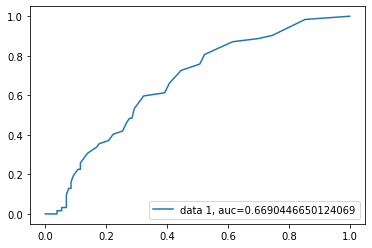

In [21]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1] # [::, 1] is just saying all values from column 1 of X_test

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba) # area under curve 

plt.plot(fpr, tpr, label='data 1, auc=' +str(auc))
plt.legend(loc=4)
plt.show()

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1-FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a basline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. 

AUC (area under curve) score. AUC score 1 represents a perfect classifier, and 0.5 represents a worthelss classifier. 

## Let's improve the model by adding more features

In [23]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
feature_cols = ['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes[feature_cols]
y = diabetes.Outcome

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
logreg_new = LogisticRegression(max_iter = 1000)

logreg_new.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg_new.predict(X_test)

In [29]:
df_new = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [30]:
df_new

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
366,1,0
301,1,0
382,0,0
140,0,0


In [31]:
cnf_matrix_new = metrics.confusion_matrix(y_test, y_pred)

In [32]:
cnf_matrix_new

array([[118,  12],
       [ 26,  36]], dtype=int64)

In the output 118 and 36 are actual predictions, and 26 and 12 are incorrect predictions

<function matplotlib.pyplot.show(*args, **kw)>

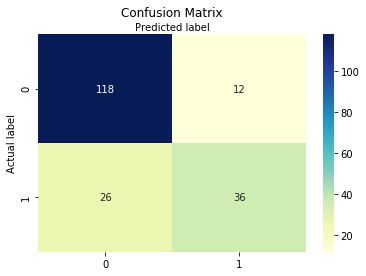

In [33]:
class_names = [0,1]

# the tick marks are the axis labels of 0 and 1 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix_new), annot = True, cmap = 'YlGnBu', fmt = 'g') # fmt = the text formatting 
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [35]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.8020833333333334
Precision 0.75
Recall 0.5806451612903226


- Accuracy of 80% (ratio of all correctly predicted observations)
- Precision of 75% ( of all patients labelled as diabetic, 75% are actually diabetic)
- Recall 58% (of all patients who have diabetes, how many we correctly labelled?)

f-score is good for comparing models 

f-score is an average between recall and precision 

- the f-score has also increased, indicating the model is performing better

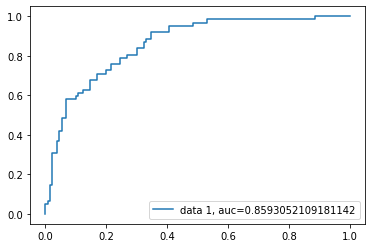

In [36]:
y_pred_proba = logreg_new.predict_proba(X_test)[::, 1] # [::, 1] is just saying all values from column 1 of X_test

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba) # area under curve 

plt.plot(fpr, tpr, label='data 1, auc=' +str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
# by this visual we can consider our updated model at predicting diabetes or not, has dramatically increased. 